### 1. 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


### 2. 데이터 로드하기

In [2]:
train = pd.read_csv('drive/MyDrive/competition_data/train.csv')
test = pd.read_csv('drive/MyDrive/competition_data/test.csv')
submission = pd.read_csv('drive/MyDrive/competition_data/sample_submission.csv')

### 3. 데이터 탐색

In [3]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [4]:
train.info()

# 70개의 feature
# target값인 nerdiness은 int형이고 결측치 없음 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [5]:
# country만 object형이고, 나머지는 모두 수치형 데이터  => 연관이 없다고 판단하여 drop 
train = train.drop(['country'], axis=1)
test = test.drop(['country'], axis=1)

### 이상치 및 결측치 처리

In [6]:
train.describe()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,15000.000000,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,...,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000,15000.000000
mean,7499.500000,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,...,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703,0.553533
std,4330.271354,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,...,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882,0.497142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3749.750000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,7499.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,11249.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
max,14999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,38822.000000,3.000000,12.000000,5.000000,2.000000,3.000000,2919.000000,2.000000,1.000000


In [8]:
# age, familysize 이상치 제거

for i in range(1, 15000):
  if train['familysize'][i] >= 10.0:
    train['familysize'][i] = None  

for i in range(1, 15000):
  if train['age'][i] >= 80.0:
    train['age'][i] = None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [9]:
train.isnull().sum()

index           0
Q1             41
Q2             69
Q3             50
Q4             71
             ... 
voted          85
married        82
familysize    351
ASD            89
nerdiness       0
Length: 69, dtype: int64

In [9]:
# target과 상관관계가 없다고 판단되는 column의 인덱스 출력 
for i in range(0, 69):
  if ((train.corr()['nerdiness'][i]) < 0.02) & ((train.corr()['nerdiness'][i]) > -0.02):
      print(train.columns[i], train.corr()['nerdiness'][i], i)

index 0.0027424430564469728 0
introelapse 0.008318522848366476 27
testelapse 0.00555023252827966 28
surveyelapse 0.011952574570179666 29
TIPI9 -0.019146410493700503 38
VCL9 0.016625042034177022 48
hand 0.013037386371983328 61
voted -0.01318527132506266 64


In [10]:
# 필요없는 columns drop 시키기 
train_data = train.drop(['index', 'introelapse', 'testelapse', 'surveyelapse', 'TIPI9', 'VCL9', 'hand', 'voted'], axis=1)
test = test.drop(['index', 'introelapse', 'testelapse', 'surveyelapse', 'TIPI9', 'VCL9', 'hand', 'voted'], axis=1)

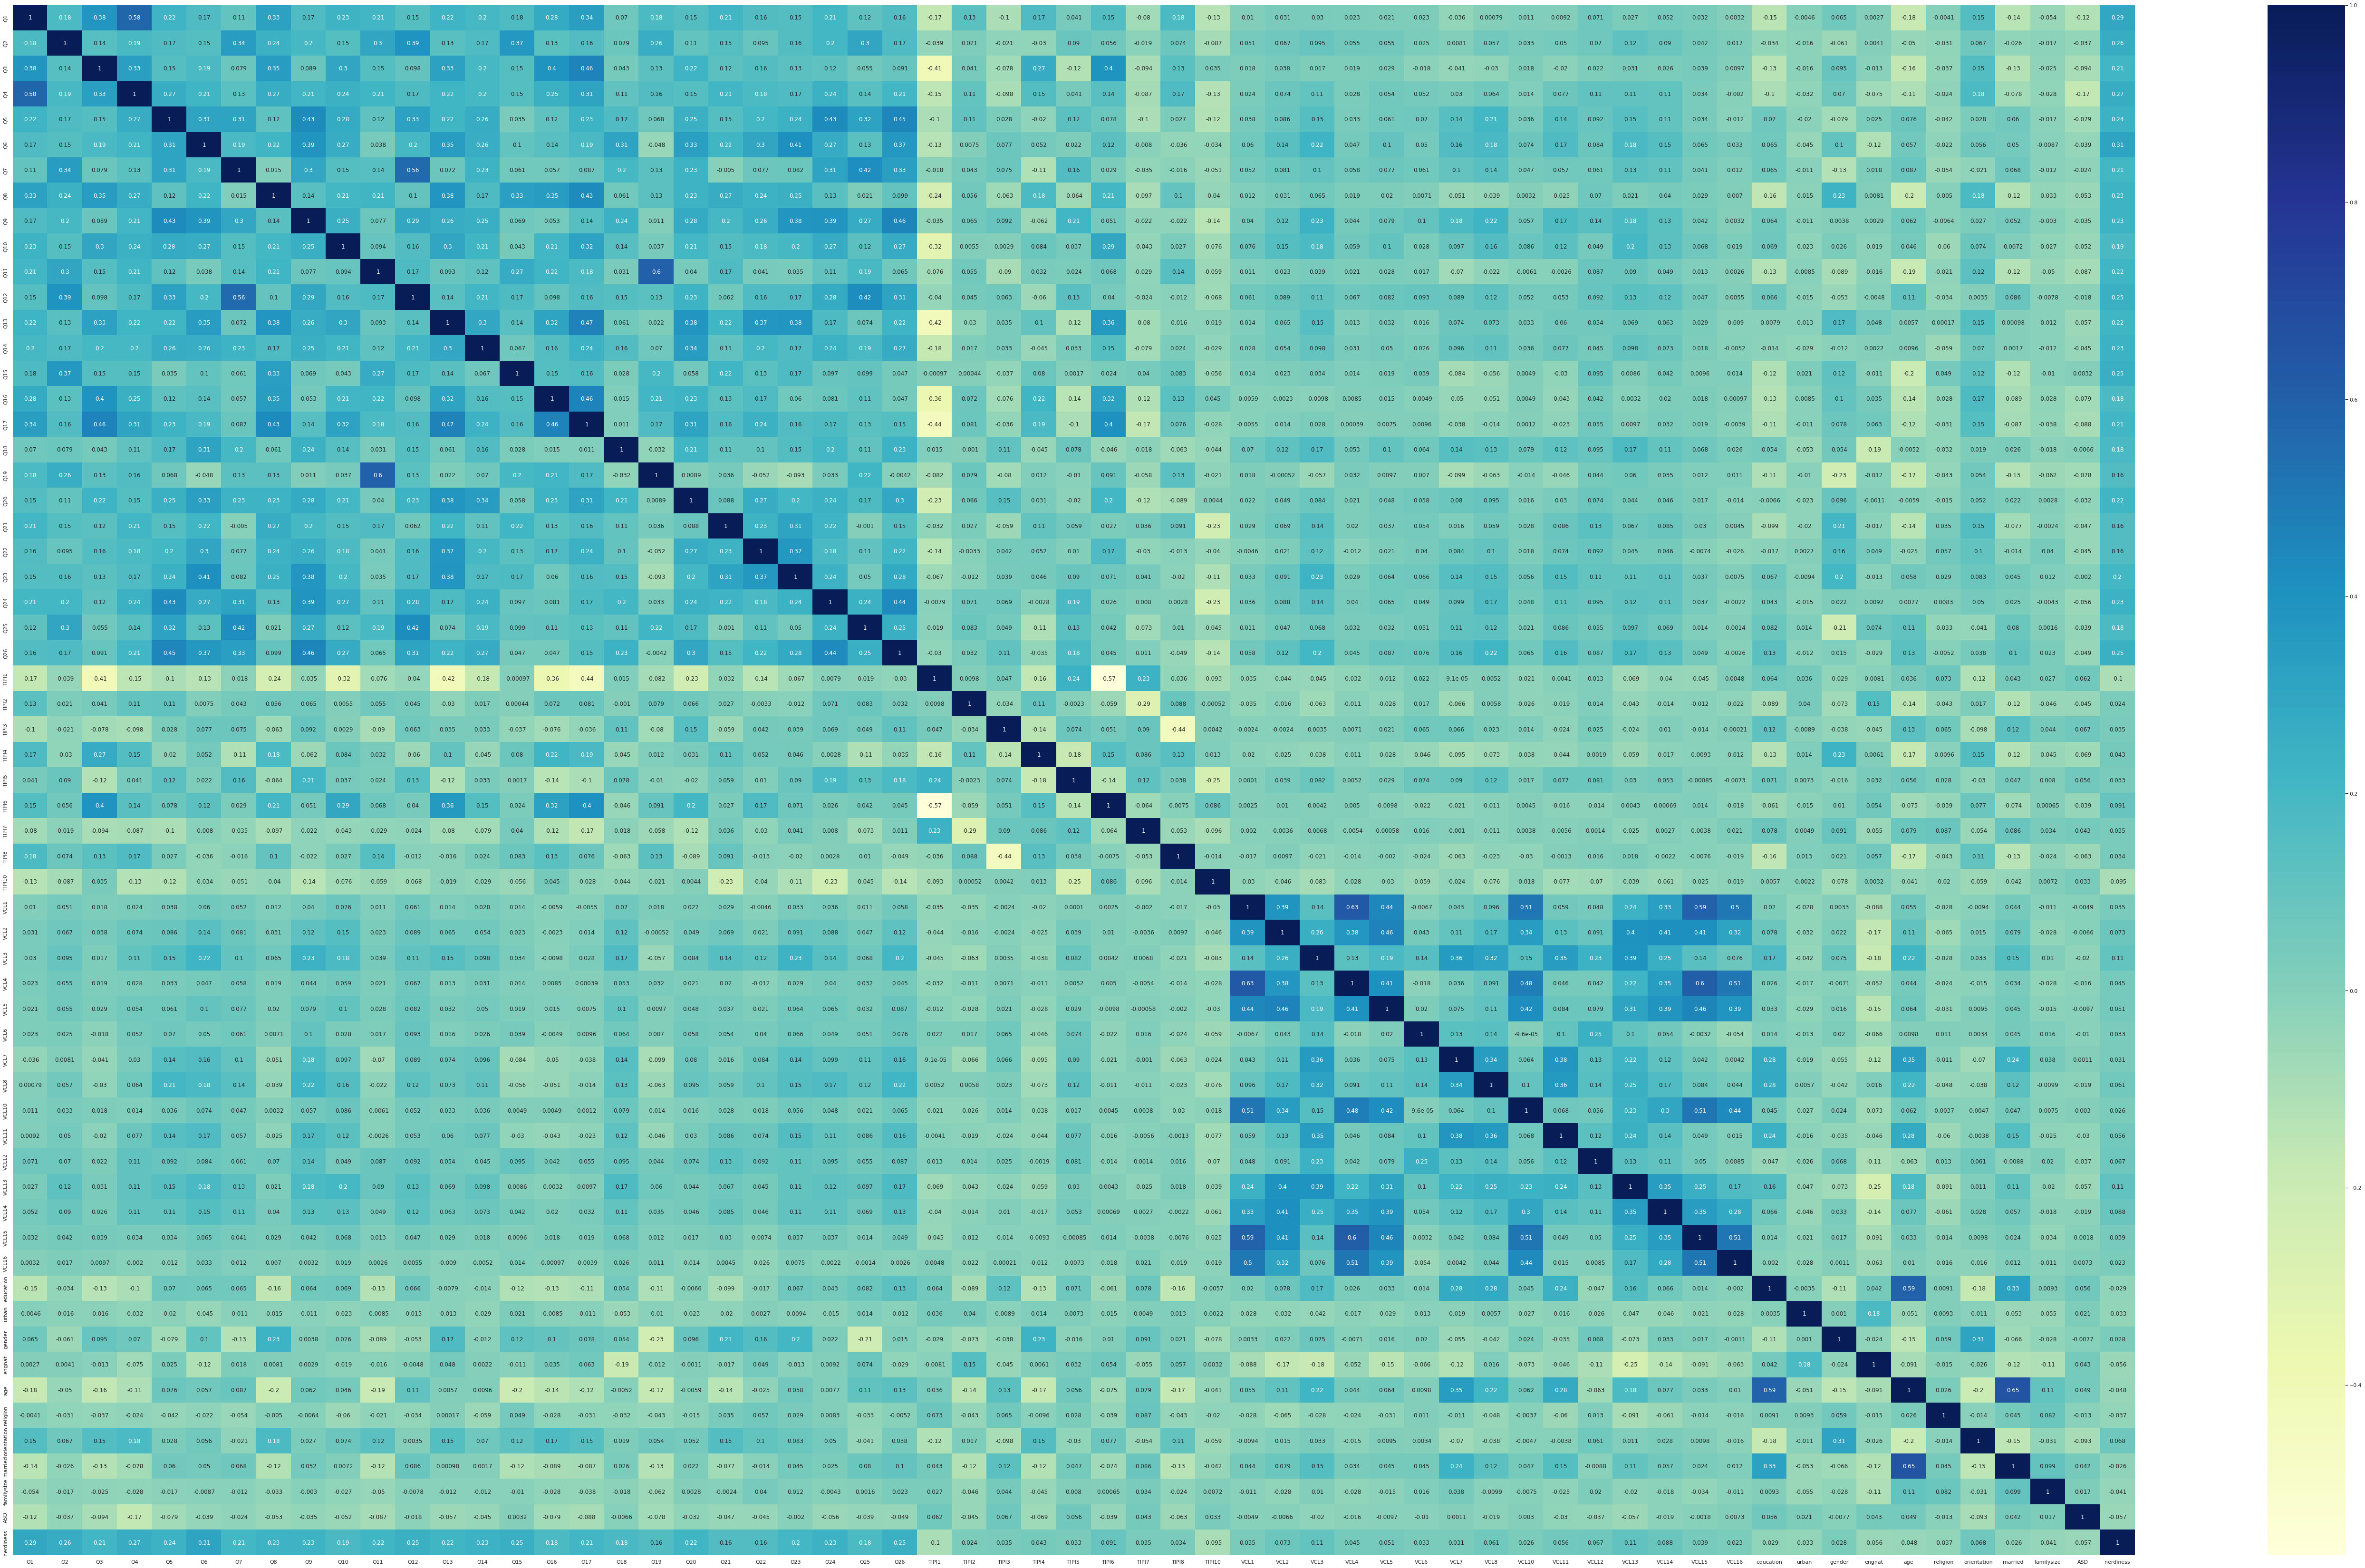

In [11]:
# 상관관계(correlation) 시각화(히트맵)
sns.set(rc={'figure.figsize': (100, 60)})
sns.heatmap(train_data.corr(), annot=True, fmt='.2g', cmap='YlGnBu')

In [11]:
# 결측치 채우기

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)

clear_train = imputer.fit_transform(train_data)
train_df = pd.DataFrame(clear_train)
train_df.columns=train_data.columns

In [12]:
train_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,urban,gender,engnat,age,religion,orientation,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,3.0,1.0,20.0,12.0,4.0,1.0,4.0,2.0,1.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,2.0,2.0,1.0,49.0,2.0,1.0,2.0,4.0,2.0,1.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,1.0,1.0,2.0,43.0,2.0,2.0,3.0,4.0,2.0,1.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,3.0,1.0,1.0,17.0,1.0,1.0,1.0,2.0,2.0,1.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,2.0,2.0,18.0,12.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2.0,2.0,1.0,17.0,1.0,3.0,1.0,3.0,2.0,0.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1.0,2.0,2.0,45.0,3.0,1.0,2.0,3.0,2.0,1.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,2.0,2.0,1.0,20.0,1.0,2.0,1.0,3.0,1.0,1.0
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,2.0,2.0,1.0,29.0,12.0,4.0,2.0,2.0,1.0,0.0


In [13]:
print(train.isnull().sum())
print('-'*40)
train_df.isnull().sum()

index           0
Q1             41
Q2             69
Q3             50
Q4             71
             ... 
voted          85
married        82
familysize    351
ASD            89
nerdiness       0
Length: 69, dtype: int64
----------------------------------------


Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
              ..
orientation    0
married        0
familysize     0
ASD            0
nerdiness      0
Length: 61, dtype: int64

### auto-ML 모델링

In [14]:
!pip install -U --pre pycaret  # pycaret 설치

# !pip install markupsafe==2.0.1
# !pip install jinja2
# import jinja2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 544 kB 7.1 MB/s 
     |████████████████████████████████| 1.8 MB 53.7 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 106 kB 57.9 MB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 134 kB 61.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 2.0 MB 50.0 MB/s 
     |████████████████████████████████| 11.2 MB 45.7 MB/s 
     |████████████████████████████████| 3.3 MB 55.0 MB/s 
     |████████████████████████████████| 6.7 MB 46.4 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 281 kB 54.6 MB/s 
     |█████████████████████

In [15]:
from pycaret.classification import *  # pycaret 분류 모델 설치 

'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.
'cuml' is a soft dependency and not included in the pycaret installation. Please run: `pip install cuml` to install.


In [16]:
!pip install xgboost==1.1.0   # 모델 출력 때 버전문제로 안나와서 따로 추가함

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127.6 MB 7.2 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [17]:
# Setup
clf = setup(data=train_df, target='nerdiness', train_size= 0.8, fold=5)

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 4eae
INFO:logs:self.variable_keys: {'_all_models', 'USI', 'fold_groups_param', 'y_test', 'html_param', '_ml_usecase', 'X_train', 'y', '_available_plots', 'pipeline', 'gpu_param', '_is_multiclass', 'fold_shuffle_param', 'exp_id', 'fold_generator', 'memory', 'master_model_container', 'fix_imbalance', 'y_train', 'seed', 'X_test', 'n_jobs_param', 'log_plots_param', '_all_models_internal', 'X', 'variable_keys', 'idx', '_all_metrics', 'target_param', '_gpu_n_jobs_param', 'logging_param', 'exp_name_log', 'data', 'display_container'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=27332632576

,Description,Value
0,Session id,3650
1,Target,nerdiness
2,Target type,Binary
3,Original data shape,"(15000, 61)"
4,Transformed data shape,"(15000, 61)"
5,Transformed train set shape,"(12000, 61)"
6,Transformed test set shape,"(3000, 61)"
7,Numeric features,60
8,Preprocess,True
9,Imputation type,simple


INFO:logs:Soft dependency imported: xgboost: 1.1.0
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:Soft dependency imported: xgboost: 1.1.0
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 2.24s...............


In [18]:
# AUC 기준으로 상위 5개 모델 선택  => et, rf, catboost, xgboost, lightgbm

best_5 = compare_models(sort='AUC', n_select=5)

INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fa74a285d50>, include=None, fold=None, round=4, cross_validation=True, sort=AUC, n_select=5, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classification.oop.ClassificationExperiment object at 0x7fa74a285d50>, 'include': None, 'exclude': None, 'fold': None, 'round': 4, 'cross_validation': True, 'sort': 'AUC', 'n_select': 5, 'budget_time': None, 'turbo': True, 'errors': 'ignore', 'fit_kwargs': None, 'groups': None, 'experiment_custom_tags': None, 'probability_threshold': None, 'engines': None, 'verbose': True, 'parallel': None, '__class__': <class 'pycaret.classification.oop.ClassificationExperiment'>}, exclude=None)
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7687,0.8583,0.8272,0.7715,0.7983,0.5279,0.5297,0.7420
rf,Random Forest Classifier,0.7707,0.8558,0.8278,0.7738,0.7998,0.5321,0.5338,0.9000
xgboost,Extreme Gradient Boosting,0.7562,0.8222,0.8074,0.7651,0.7857,0.5034,0.5044,1.5860
lightgbm,Light Gradient Boosting Machine,0.7478,0.8160,0.8085,0.7537,0.7801,0.4852,0.4868,0.9400
gbc,Gradient Boosting Classifier,0.7318,0.8019,0.7945,0.7401,0.7663,0.4524,0.4540,1.6820
lr,Logistic Regression,0.7228,0.7931,0.7907,0.7308,0.7595,0.4336,0.4355,1.8320
lda,Linear Discriminant Analysis,0.7235,0.7929,0.8017,0.7270,0.7625,0.4336,0.4366,0.1320
ada,Ada Boost Classifier,0.7187,0.7887,0.7745,0.7326,0.7529,0.4269,0.4278,0.5200
nb,Naive Bayes,0.6866,0.7467,0.7624,0.6988,0.7292,0.3589,0.3609,0.1140
knn,K Neighbors Classifier,0.6859,0.7345,0.7707,0.6950,0.7309,0.3562,0.3589,1.0520


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 3.4586588541666666e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fa74a285d50>, estimator=lr, fold=StratifiedKFold(n_splits=5, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7fa748234f50>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3650, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
          

### 모델 생성하기
- best_5 = [et, rf, catboost, xgboost, lightgbm]

In [ ]:
# 랜덤포레스트 모델 생성
rf = create_model('rf', n_estimators=500, fold=5)
# parameter 튜닝
tuned_rf = tune_model(rf)
# 과적합 방지를 위한 배깅기법
bagged_rf = ensemble_model(tuned_rf, method='Bagging')

In [ ]:
# extra tree 모델 생성 (랜덤포레스트와 동일한 작업)

et = create_model('et', n_estimators=500, class_weight='balanced')
tuned_et = tune_model(et)
bagged_et = ensemble_model(tuned_et, method = 'Bagging')

In [ ]:
# 나머지 모델 생성
catboost = create_model('catboost')
xgb = create_model('xgboost', n_estimators=500, learning_rate=0.01)
lgbm = create_model('lightgbm', n_estimators=500, learning_rate=0.01)

### 앙상블

In [19]:
# 제일 성능이 좋은 두 모델 
blended = blend_models(estimator_list=best_5, method='soft', fold=10)

INFO:logs:Initializing blend_models()
INFO:logs:blend_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fa74a285d50>, estimator_list=[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=3650, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7712,0.8530,0.8277,0.7746,0.8003,0.5333,0.5349
1,0.7658,0.8492,0.8299,0.7665,0.7970,0.5214,0.5237
2,0.7858,0.8590,0.8404,0.7870,0.8128,0.5632,0.5649
3,0.7804,0.8475,0.8404,0.7799,0.8090,0.5516,0.5538
4,0.7662,0.8467,0.8215,0.7710,0.7955,0.5234,0.5248
Mean,0.7739,0.8511,0.8320,0.7758,0.8029,0.5386,0.5404
Std,0.0079,0.0045,0.0074,0.0071,0.0068,0.0163,0.0163


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Getting model names
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fa74a285d50>, estimator=VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurit

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
    

In [20]:
final_model = finalize_model(blended)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fa74a285d50>, estimator=VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
          

### 결과 예측하기

In [22]:
prediction = predict_model(final_model, data=test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7fa74a285d50>, estimator=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
                                             'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
                                             'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
                                             'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
                                             'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                                             'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=T...
                                                                    

INFO:logs:Set up data.


### 제출

In [23]:
submission['nerdiness'] = prediction['Label']
submission.to_csv("blend.csv", index=False)

In [24]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0
